## Customising Visualisations

Visualisation is a huge part of what I do as a marketer. Visualising data helps me spot trends, problems and oppertunities. Having strong visualisation skills will also help you to communicate your data driven ideas and plans to your boss\team\clients\stakehodlers.

By the end of this section you I will haveshown you how to draw, augment and stylize your visualizations using `Pandas`, `Matplotlib` and `Seaborn`.

## Libraries

In [1]:
import pandas as pd # importing pandas library
import matplotlib.pyplot as plt #importing matplotlib library
import seaborn as sns #importing seaborn package
%matplotlib inline

import warnings #for managing error message
warnings.filterwarnings('ignore')

## Importing and exploring data

In [11]:
ga_gsc_data = pd.read_csv('data/other_data/ga_gsc_data.csv',
                          usecols=['Page', 'Clicks', 'Impressions', 'CTR', 'Position',
                                   'Avg. Time on Page', 'Bounce Rate', 'Exit', 'Pageviews',
                                   'Unique Pageviews'])

In [5]:
#View the make up of the data using .info()
ga_gsc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
Page                 193 non-null object
Clicks               193 non-null int64
Impressions          193 non-null int64
CTR                  193 non-null object
Position             193 non-null float64
Avg. Time on Page    193 non-null object
Bounce Rate          193 non-null float64
Exit                 193 non-null float64
Pageviews            193 non-null int64
Unique Pageviews     193 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 15.2+ KB


In [6]:
#Have a look at the data
ga_gsc_data.head()

,Page,Clicks,Impressions,CTR,Position,Avg. Time on Page,Bounce Rate,Exit,Pageviews,Unique Pageviews
0,https://miratrix.co.uk/,371,100673,0.37%,42.59,0 days 00:01:43.666666666,47.296667,54.286667,1396,1095
1,https://miratrix.co.uk/app-marketing-agency/,80,30824,0.26%,26.84,0 days 00:01:45.333333333,64.436667,60.913333,210,181
2,https://miratrix.co.uk/mobile-app-competitor-a...,16,1458,1.1%,30.64,0 days 00:04:06.000000000,53.335000,89.475000,30,26
3,https://miratrix.co.uk/blippar-the-message-isn...,11,517,2.13%,36.05,0 days 00:00:22.333333333,58.170000,78.333333,27,21
4,https://miratrix.co.uk/author/nduddy/,10,140,7.14%,5.61,0 days 00:02:52.000000000,22.223333,38.890000,15,13


## Prepare Data for Visualisation

You can see from the info table above that we have some Series which should be numerical or time but are instead are Objects. Before visualising you must transform this data into the correct data type.

In [8]:
#Remove the % sign by using string replace
ga_gsc_data.CTR = ga_gsc_data.CTR.str.replace('%','')

In [9]:
#Replace 0 days with nothing and convert the remaining string to a timedelta
ga_gsc_data['Avg. Time on Page'] = ga_gsc_data['Avg. Time on Page'].str.replace('0 days ','').apply(pd.Timedelta)

In [13]:
#Set Page as index
ga_gsc_data.set_index('Page', inplace=True)

### Plot a basic visualisation 

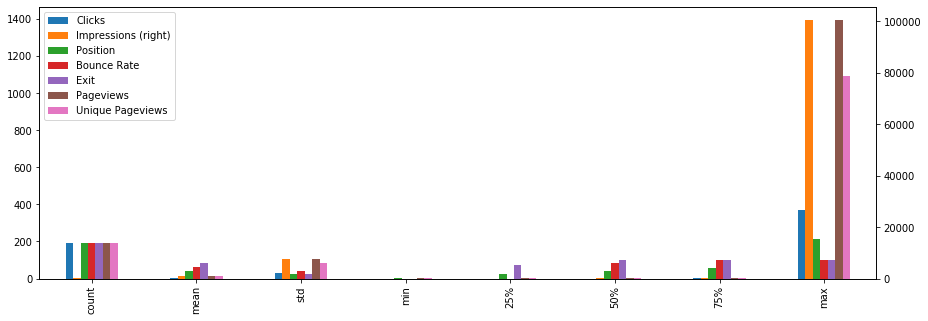

In [14]:
#Plot a basic bar chart showing the statstical breakdown the data set
ga_gsc_data.describe().plot.bar(figsize=(15,5), secondary_y='Impressions')

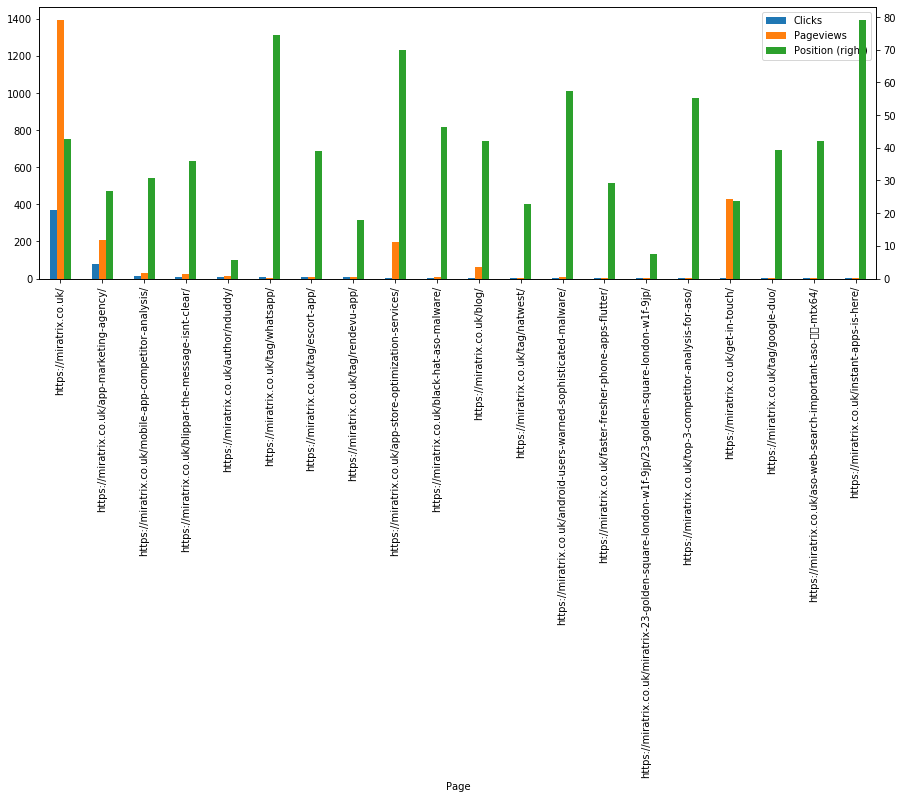

In [15]:
ga_gsc_data[['Clicks', 'Pageviews', 'Position']][:20].plot.bar(figsize=(15,5), 
                                                               secondary_y=('Position'))

# Customising Plots with matplotlib

Matplotlib is the underlying plotting library for Pandas. Many of the more recent tools create for visualising data are built on top of matplotlib, including Seaborn a popular library that we'll investigate later in this notebook. In this section you'll use functions from matplotlib to customise charts for presentations.

## Creating matplotlib subplots

Subplots are a common method for drawing two plots either side by side as an overlay. You will see this concept depicted in many python plotting tutorials and it's good to understand how the functions work.

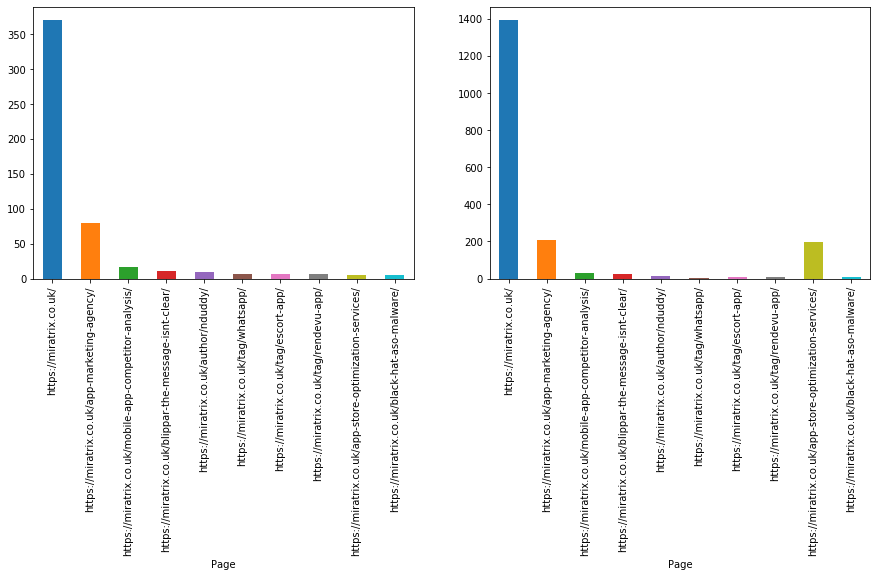

In [16]:
#Create subplots of two Series of data from ga_gsc_data
fig = plt.figure(figsize=(15,5)) # Create matplotlib figure

ax = fig.add_subplot(121) # Create matplotlib axes (nrows, ncolumns, postion)
ax2 = fig.add_subplot(122) # Create another axes

#first plot
ga_gsc_data['Clicks'][:10].plot.bar(ax=ax #set the matplotlib axes to ax
                                   ) 
#second plot
ga_gsc_data['Pageviews'][:10].plot.bar(ax=ax2 #set the matplotlib axes to ax2
                                      )
plt.show() #display the charts

## Plotting a seconday y axes 

In many occasions in marketing you will need to plot a seconday y axes. This is because many datasets have one column of data much larger than any other column. This makes it very difficult to understand the relationships between data points as one dwarfs the rest of the data. In this video you will learn how to plot a seconday y access and overlay two subplots onto a single chart.

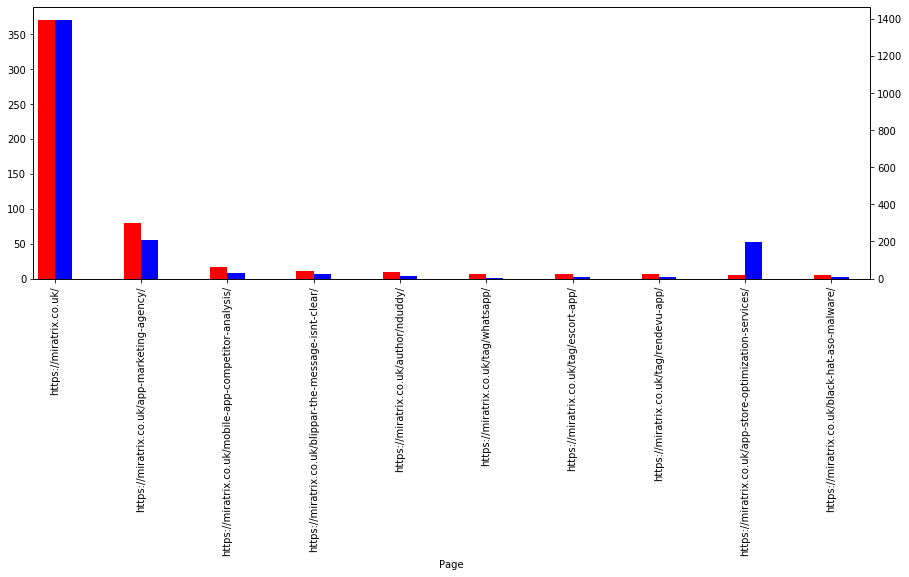

In [19]:
fig = plt.figure(figsize=(15,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2 #the width of the bars

ga_gsc_data['Clicks'][:10].plot.bar(color='red',  #colour of bar
                                ax=ax, #what matplotlinb axes to use
                                width=width, #what matplotlinb axes to use
                                position=1)#the postion of the bar relative to the others

ga_gsc_data['Pageviews'][:10].plot(kind='bar', #type of plot
                                   color='blue', #colour of bar
                                   ax=ax2, #what matplotlinb axes to use
                                   width=width,#what matplotlinb axes to use
                                   position=0)#the postion of the bar relative to the others


#display the charts
plt.show() 

## Adding x and y labels to a plot

We may need to add labels to our x and y axes to ensure clarity of a report and that those not familiar with the topic can keep up with what is going on. In this tutorial you'll learn how to do this.

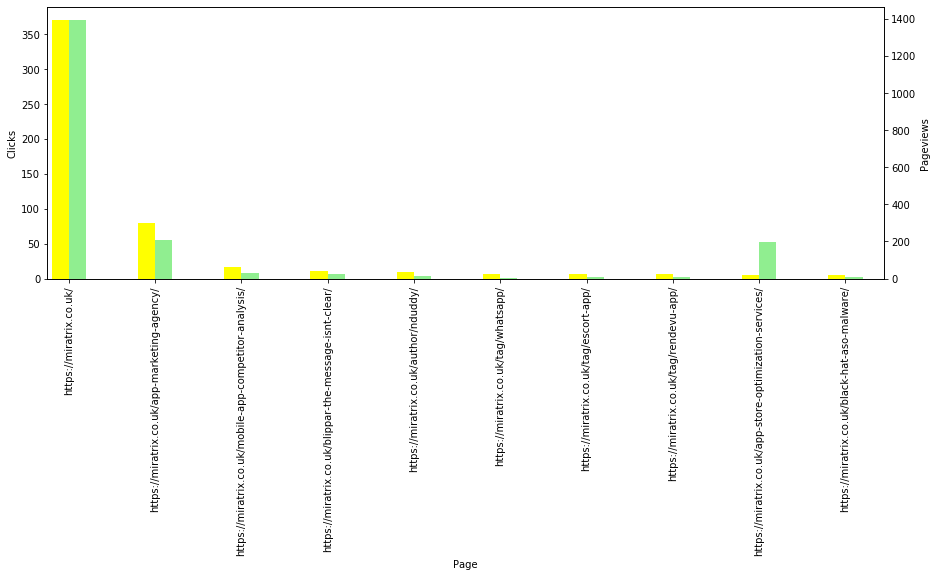

In [20]:
fig = plt.figure(figsize=(15,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2 #set the width of the bars

ga_gsc_data['Clicks'][:10].plot(kind='bar', #type of chart to use
                                color='yellow', #colour of bar
                                ax=ax, #what matplotlinb axes to use
                                width=width, #what matplotlinb axes to use
                                position=1, #the postion of the bar relative to the others
                                fontsize=10) #set font size 
ga_gsc_data['Pageviews'][:10].plot(kind='bar', 
                                   color='lightgreen', 
                                   ax=ax2,
                                   width=width,
                                   position=0)

#Create ax customatisations
ax.set_xlabel('Page') #name the x axis
ax.set_ylabel('Clicks') # name the primary y axis

#Create ax2 customatisations
ax2.set_ylabel('Pageviews') #name the secondary y axis

#display the charts
plt.show() 

## Rotating xticks labels on plot

Sometimes you may want to change the position of your ticks to make them more readable. This is particularly apperent in this example when we're dealing with URL strings as the xtick label. In this video you'll learn how to change the angle of which the labels are displayed.

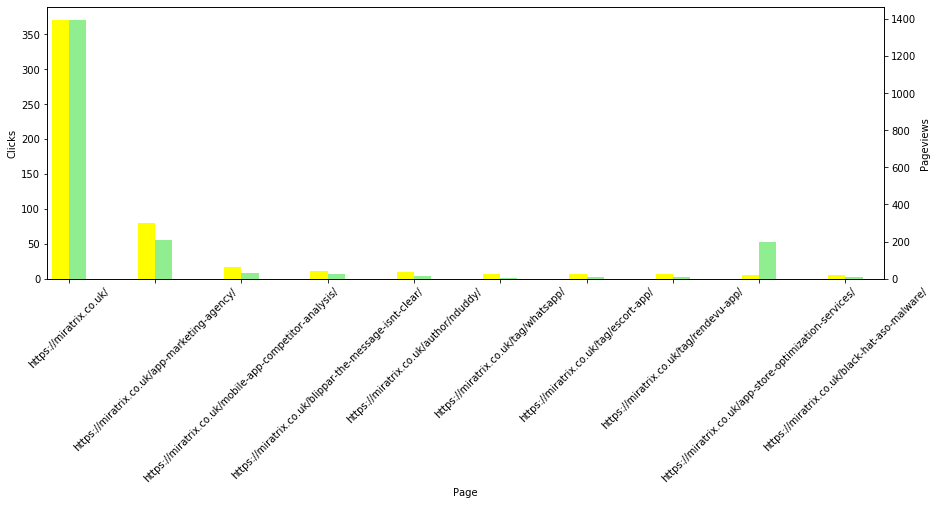

In [24]:
fig = plt.figure(figsize=(15,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2 #set the width of the bars

ga_gsc_data['Clicks'][:10].plot(kind='bar', #type of chart to use
                                color='yellow', #colour of bar
                                ax=ax, #what matplotlinb axes to use
                                width=width, #set the bar width
                                position=1, #the postion of the bar relative to the others
                                fontsize=10) #set font size 
ga_gsc_data['Pageviews'][:10].plot(kind='bar', 
                                   color='lightgreen', 
                                   ax=ax2,
                                   width=width,
                                   position=0)

#Create ax customatisations
ax.set_xlabel('Page') #name the x axis
ax.set_ylabel('Clicks') # name the primary y axis
ax.set_xticklabels(ax.get_xticklabels(), #get a strings with the label names
                   rotation=45) #Rotate the xticks labels by degrees

#Create ax2 customatisations
ax2.set_ylabel('Pageviews') #name the secondary y axis

#display the charts
plt.show() 

## Adding a legend to a plot

When creating plots using subplots you will need to explicitly set the legend for the figure. if you are calling multiple data points in and they are not labelled correctly the person reading the plot won't know what you're referencing. This will make communicating your needs and plans difficult.

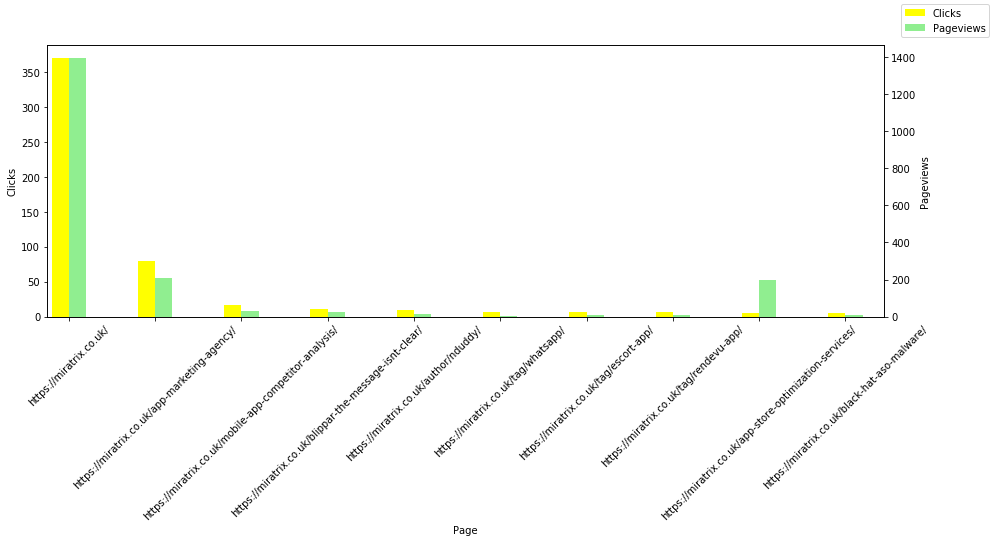

In [27]:
fig = plt.figure(figsize=(15,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2 #set the width of the bars

ga_gsc_data['Clicks'][:10].plot(kind='bar', #type of chart to use
                                color='yellow', #colour of bar
                                ax=ax, #what matplotlinb axes to use
                                width=width, #set the bar width
                                position=1, #the postion of the bar relative to the others
                                fontsize=10) #set font size 
ga_gsc_data['Pageviews'][:10].plot(kind='bar', 
                                   color='lightgreen', 
                                   ax=ax2,
                                   width=width,
                                   position=0)

#Create ax customatisations
ax.set_xlabel('Page') #name the x axis
ax.set_ylabel('Clicks') # name the primary y axis
ax.set_xticklabels(ax.get_xticklabels(), #get a strings with the label names
                   rotation=45) #Rotate the xticks labels by degrees

#Create ax2 customatisations
ax2.set_ylabel('Pageviews') #name the secondary y axis

#Global Plot settings
fig.legend() # set the legend

#display the charts
plt.show() 

## Adding a title to your plot

Properly labeling your chart so that a viewer can understand immedately what's being communicated is important for you and your organisation. You can easily create the chart name by plotting the title.

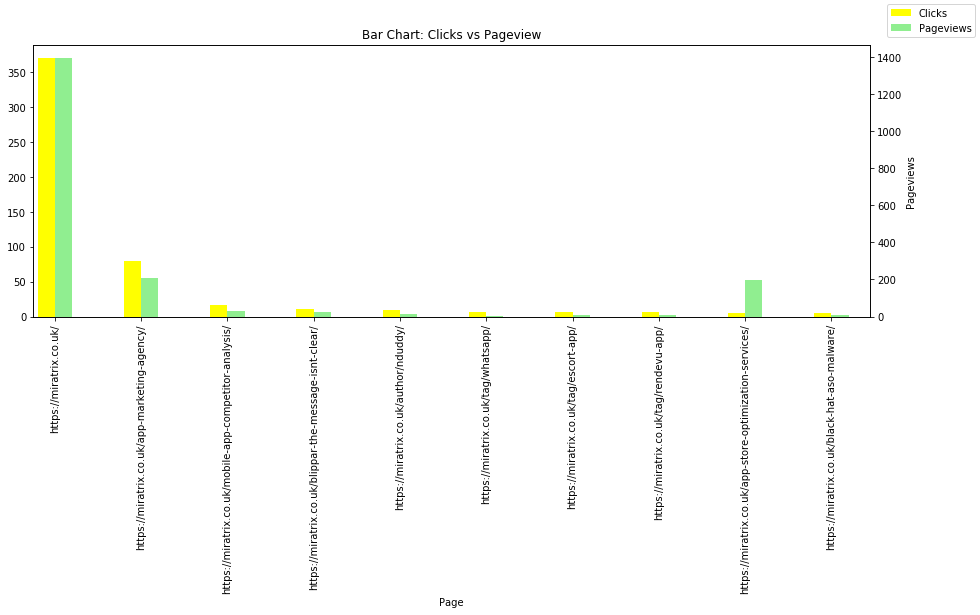

In [30]:
fig = plt.figure(figsize=(15,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2 #set the width of the bars

ga_gsc_data['Clicks'][:10].plot(kind='bar', #type of chart to use
                                color='yellow', #colour of bar
                                ax=ax, #what matplotlinb axes to use
                                width=width, #set the bar width
                                position=1, #the postion of the bar relative to the others
                                fontsize=10) #set font size 
ga_gsc_data['Pageviews'][:10].plot(kind='bar', 
                                   color='lightgreen', 
                                   ax=ax2,
                                   width=width,
                                   position=0)

#Create ax customatisations

ax2.set_ylabel('Pageviews') #name the secondary y axis

#Global Plot settings
plt.title('Bar Chart: Clicks vs Pageview') # set chart name
fig.legend() # set the legend

#display the charts
plt.show() 

## Adding annotation to a plot

This is a great way of communicating to others clearly that "PEOPLE THE PROBLEM IS RIGHT HERE!". Using plot annotations allows you to be very specific on what parts of a chart you want viewers to pay attention to and it's pretty easy to do.

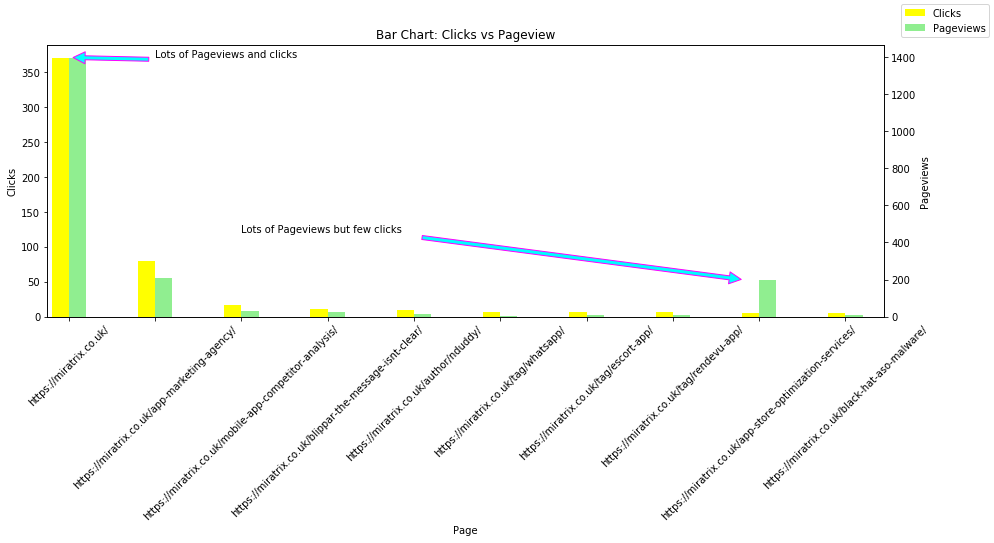

In [31]:
fig = plt.figure(figsize=(15,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2 #set the width of the bars

ga_gsc_data['Clicks'][:10].plot(kind='bar', #type of chart to use
                                color='yellow', #colour of bar
                                ax=ax, #what matplotlinb axes to use
                                width=width, #set the bar width
                                position=1, #the postion of the bar relative to the others
                                fontsize=10) #set font size 
ga_gsc_data['Pageviews'][:10].plot(kind='bar', 
                                   color='lightgreen', 
                                   ax=ax2,
                                   width=width,
                                   position=0)

#Create ax customatisations
ax.annotate('Lots of Pageviews but few clicks', 
            xy=(8, 50), 
            xytext=(2, 120),
            arrowprops=dict(facecolor='cyan', #colour
                            shrink=0.05, #length of arrow
                            lw=1, #line width
                            ec='magenta', #boarder colour
                            zorder=1) #layering order of annotation
           )
ax.set_xlabel('Page') #name the x axis
ax.set_ylabel('Clicks') # name the primary y axis
ax.set_xticklabels(ax.get_xticklabels(), #get a strings with the label names
                   rotation=45) #Rotate the xticks labels by degrees

#Create ax customatisations
ax2.annotate('Lots of Pageviews and clicks', 
            xy=(0, 1398), 
            xytext=(1, 1398),
            arrowprops=dict(facecolor='cyan', #colour
                            shrink=0.05, #length of arrow
                            lw=1, #line width
                            ec='magenta', #boarder colour
                            zorder=1) #layering order of annotation
           )
ax2.set_ylabel('Pageviews') #name the secondary y axis

#Global Plot settings
plt.title('Bar Chart: Clicks vs Pageview') # set chart name
fig.legend() # set the legend

#display the charts
plt.show() 

## Switching between Matplotlib styles sheets

If you're like me and you don't want to think about colour schemes too much then matplotlib has a solution for you. They've create a bunch of <a herf="https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html">prebaked chart style sheets</a> which you can switch between. This takes the thought out of style so that you can focus on the key points you want to communicate.

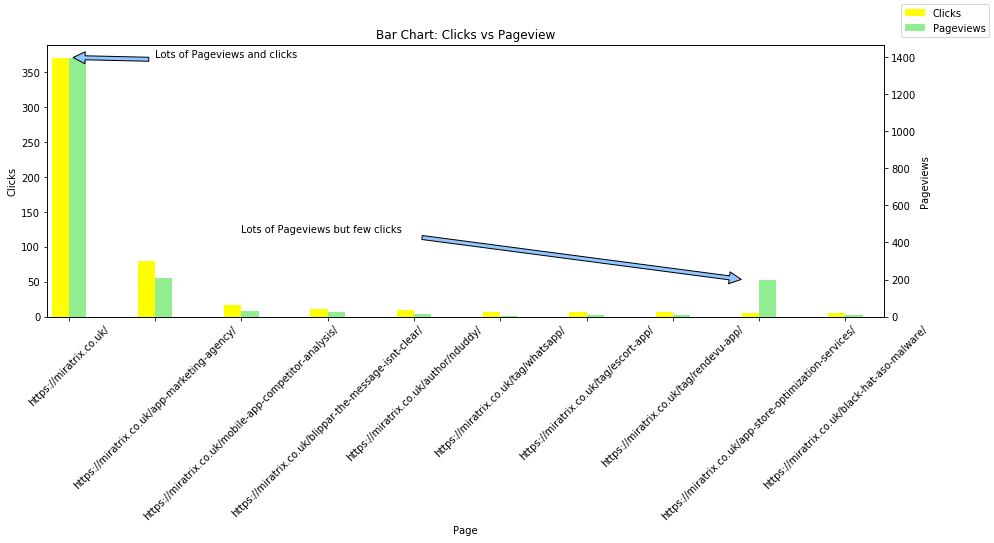

In [33]:
plt.style.use('seaborn-pastel') #set a style sheet

fig = plt.figure(figsize=(15,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2 #set the width of the bars

ga_gsc_data['Clicks'][:10].plot(kind='bar', #type of chart to use 
                                color='yellow', 
                                ax=ax, #what matplotlinb axes to use
                                width=width, #set the bar width
                                position=1, #the postion of the bar relative to the others
                                fontsize=10) #set font size 
ga_gsc_data['Pageviews'][:10].plot(kind='bar', 
                                   color='lightgreen', 
                                   ax=ax2,
                                   width=width,
                                   position=0)

#Create ax customatisations
ax.annotate('Lots of Pageviews but few clicks', 
            xy=(8, 50), 
            xytext=(2, 120),
            arrowprops=dict(shrink=0.05, #length of arrow
                            lw=1, #line width
                            zorder=1) #layering order of annotation
           )
ax.set_xlabel('Page') #name the x axis
ax.set_ylabel('Clicks') # name the primary y axis
ax.set_xticklabels(ax.get_xticklabels(), #get a strings with the label names
                   rotation=45) #Rotate the xticks labels by degrees

#Create ax customatisations
ax2.annotate('Lots of Pageviews and clicks', 
            xy=(0, 1398), 
            xytext=(1, 1398),
            arrowprops=dict(shrink=0.05, #length of arrow
                            lw=1, #line width
                            zorder=1) #layering order of annotation
           )
ax2.set_ylabel('Pageviews') #name the secondary y axis

#Global Plot settings
plt.title('Bar Chart: Clicks vs Pageview') # set chart name
fig.legend() # set the legend

#display the charts
plt.show()

In [34]:
plt.style.use('default') # restores the notebook back to default palette

# Plotting in Seaborn

Seaborn is a plotting package built on `matplotlib` and allows for very pretty plots with very little code. The syntax is different from matplotlib and pandas plot but you'll soon get a handle on it.

We imported seaborn as `sns` earlier in the notebook.

## Plot a scatter plot in Seaborn

In this section we're going to plot a scatter graph in Seaborn and customise it with colours and sizes to make the data more readable.

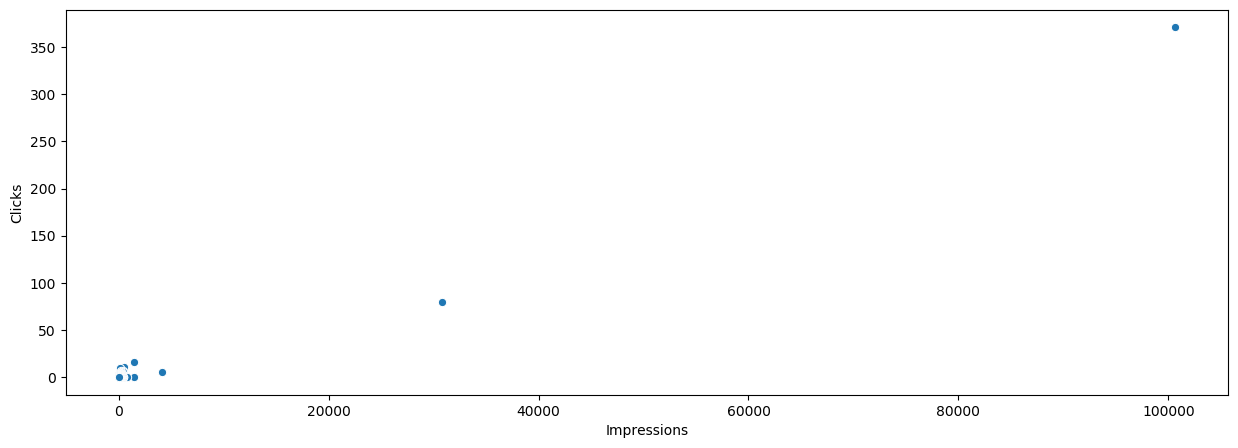

In [35]:
fig = plt.figure(figsize=(15,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes

sns.scatterplot(x='Impressions', # x axes
                y="Clicks", # y axes
                data=ga_gsc_data) #the dataset we're using

#display the charts
plt.show() 

For this plot we will add the `hue` argument. This will allow us to apply a different hue to the dots based on a numerical value in the column we selected.

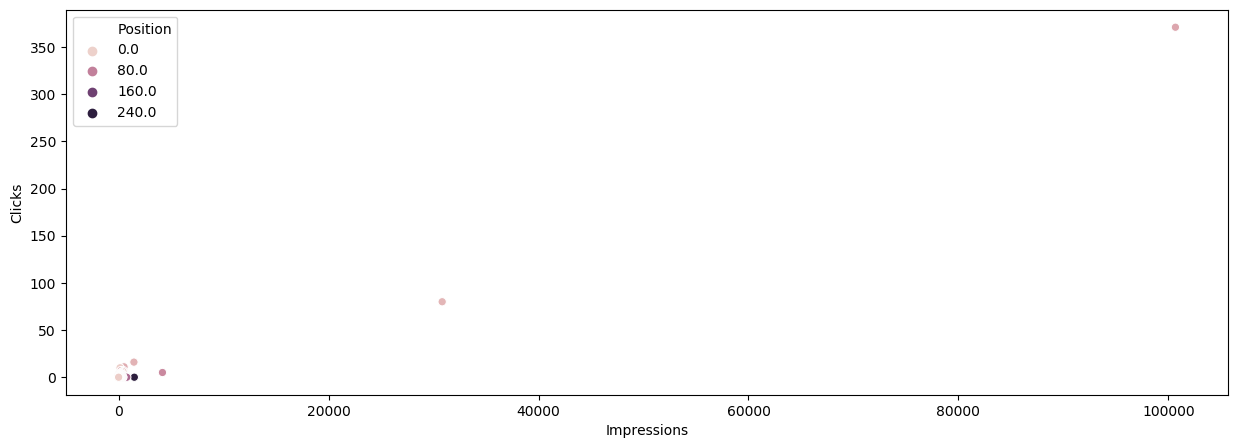

In [36]:
fig = plt.figure(figsize=(15,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes

sns.scatterplot(x='Impressions', # x axes
                y="Clicks", # y axes
                hue='Position',# colouring the dots based on a num value
                data=ga_gsc_data) #the dataset we're using

#display the charts
plt.show() 

This time we will add the `size` argument. This will allow us to apply a different size to the dots based on a numerical value in the column we selected.

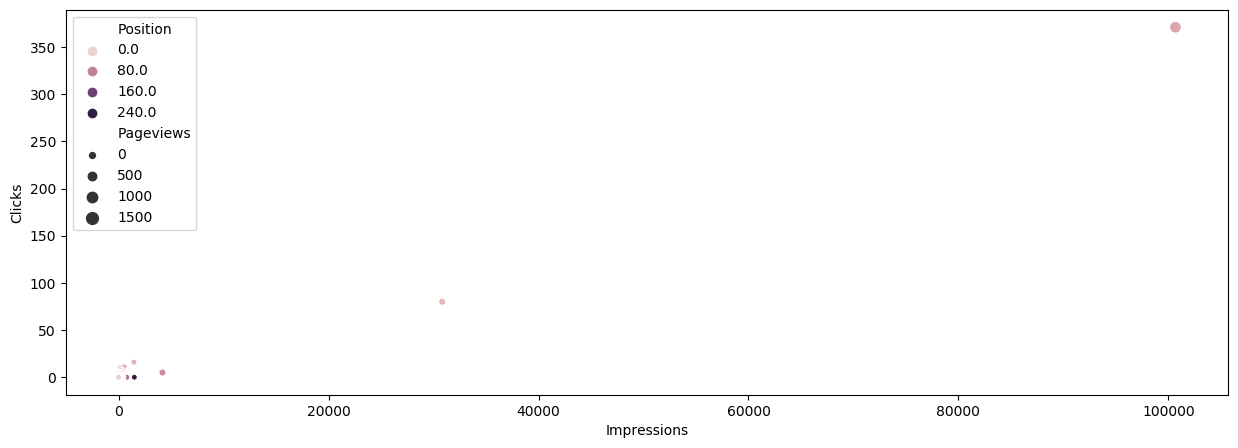

In [37]:
fig = plt.figure(figsize=(15,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes

sns.scatterplot(x='Impressions',# x axes
                y="Clicks",# xy axes
                hue='Position',# colouring the dots based on a num value
                size="Pageviews", # increasing the size of the dots based on a num values
                data=ga_gsc_data) #the dataset we're using

#display the charts
plt.show() 

Finally we will pass a colour `pallete` to the scatter chart. This will change the colours of the plotted dots. In this case we are going to pass colour pallette "Set2".

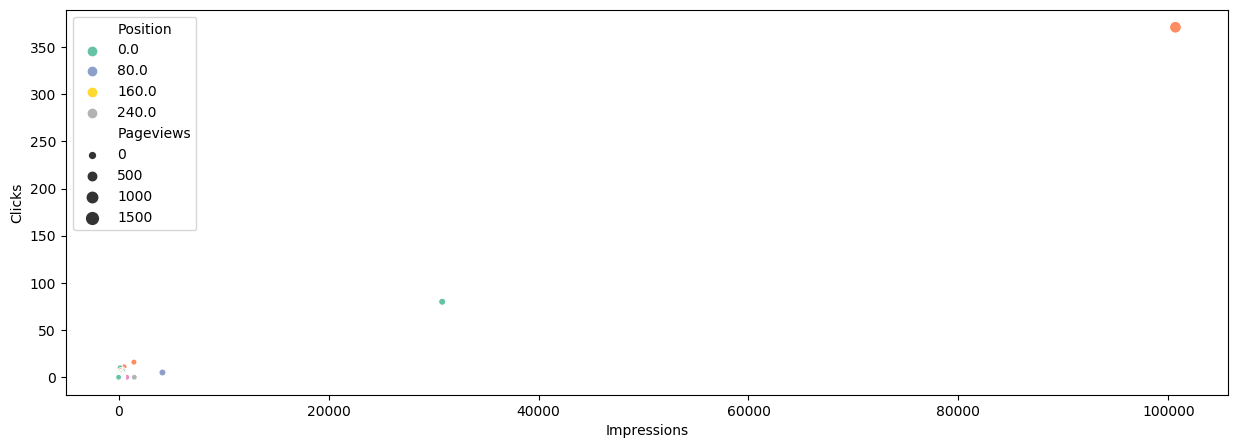

In [38]:
fig = plt.figure(figsize=(15,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes

sns.scatterplot(x='Impressions',# x axes
                y="Clicks",# xy axes
                hue='Position',# colouring the dots based on a num value
                size="Pageviews", # increasing the size of the dots based on a num values
                palette="Set2", # selecting a colour palette
                data=ga_gsc_data) #the dataset we're using

#display the charts
plt.show() 

### Plot a Facebook ad metric heatmap in Seaborn

It's difficult to argue that heatmaps are impressive looking visualsations. They're also incredibly useful when you correlation data into them. A heatmap with correlation data can help you find related features in a dataset that you should focus on. Pandas together with Seaborn makes it very easy to create correlations that you can plot in a heatmap and get answer fast.

In [39]:
#Load the facebook data fb_example_data.csv
fb_camp_data = pd.read_csv('data/other_data/fb_example_data.csv')

In [40]:
fb_camp_data.head()

,Results,Reach,Frequency,Cost per results,Budget,Amount spent (GBP),Clicks (all),CTR (all),CPC (all) (GBP),Impressions,"CPM (cost per 1,000 impressions) (GBP)",Link clicks,CPC (cost per link click) (GBP),CTR (link click-through rate),Website purchases,Website purchases conversion value,Website purchase ROAS (return on advertising spend),Button clicks
0,105,77905,1.182132,2.871238,187.2,301.48,2570,2.790627,0.117307,92094,3.273612,2126,0.141806,2.308511,105,10927.20,36.245190,482
1,77,59035,1.204590,3.910130,187.2,301.08,1846,2.595869,0.163099,71113,4.233825,1580,0.190557,2.221816,77,8525.30,28.315730,319
2,49,48718,1.254116,6.135102,187.2,300.62,1485,2.430521,0.202438,61098,4.920292,1223,0.245805,2.001702,49,5955.55,19.810891,261
3,66,66413,1.259859,3.957727,187.2,261.21,1703,2.035353,0.153382,83671,3.121870,1342,0.194642,1.603901,66,9079.10,34.757858,342
4,47,64472,1.320946,5.499787,187.2,258.49,1373,1.612184,0.188267,85164,3.035203,1099,0.235205,1.290451,47,4602.00,17.803397,257


In [41]:
#inspect the data
fb_camp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 18 columns):
Results                                                19 non-null int64
Reach                                                  19 non-null int64
Frequency                                              19 non-null float64
Cost per results                                       19 non-null float64
Budget                                                 19 non-null float64
Amount spent (GBP)                                     19 non-null float64
Clicks (all)                                           19 non-null int64
CTR (all)                                              19 non-null float64
CPC (all) (GBP)                                        19 non-null float64
Impressions                                            19 non-null int64
CPM (cost per 1,000 impressions) (GBP)                 19 non-null float64
Link clicks                                            19 non-null int64
CPC (co

In [42]:
#Create a correlation matrix and store as fb_corr
fb_corr = fb_camp_data.corr()

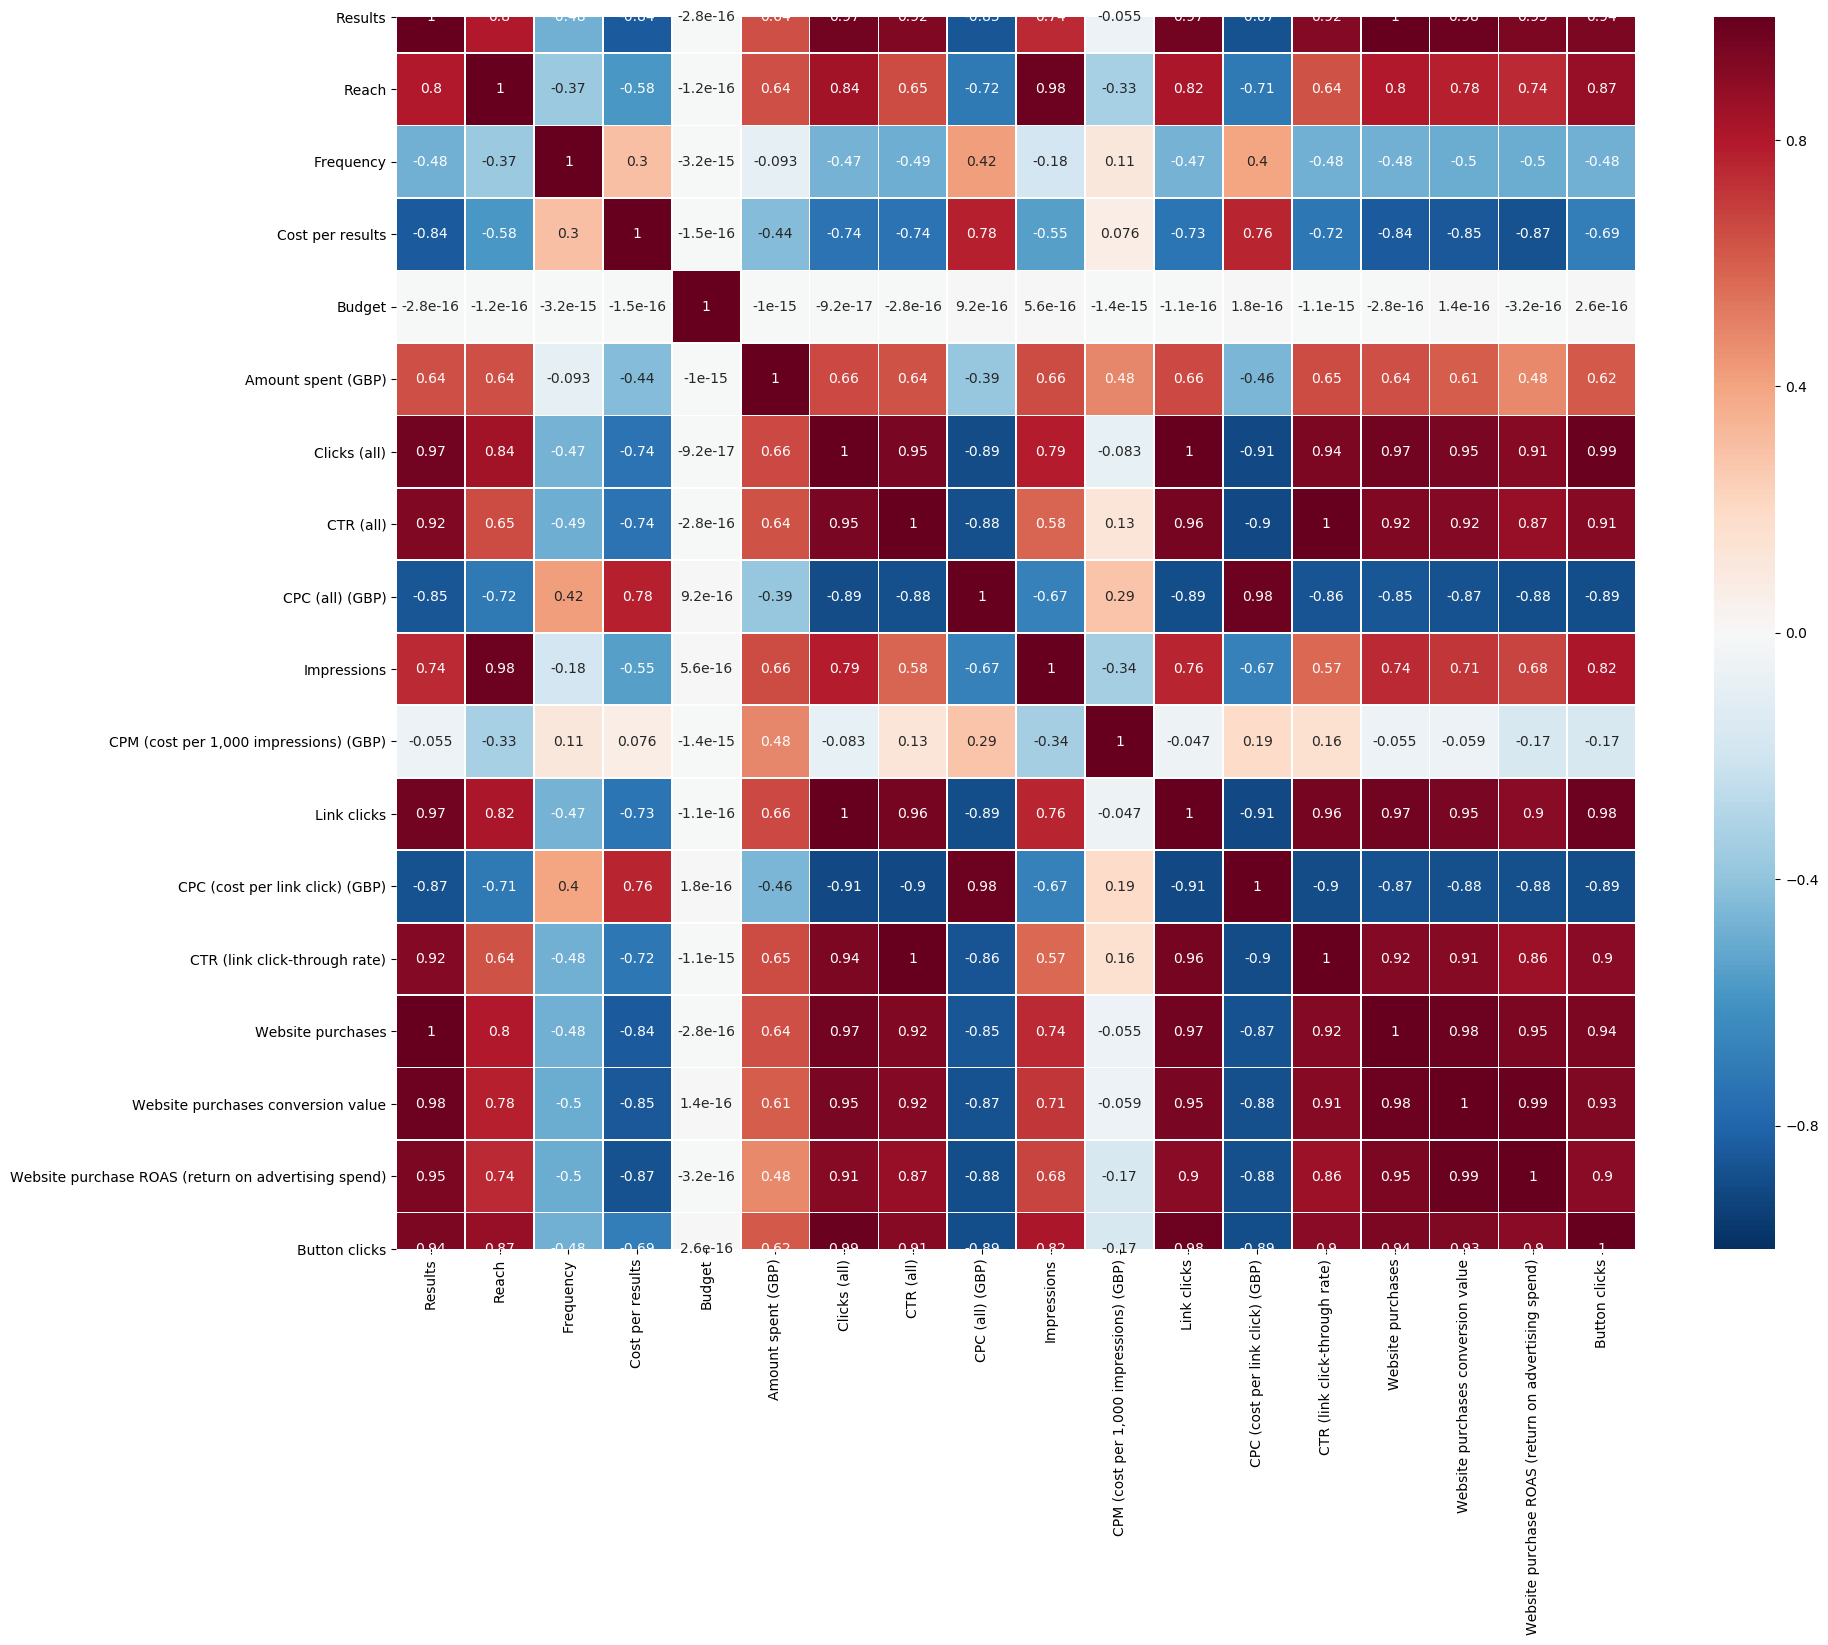

In [44]:
#Use seaborn to draw a heatmap of the correlated features in our dataset
plt.figure(figsize=(20,16))
sns.heatmap(fb_corr, #load data
           linewidth=0.5, #line width
           cmap='RdBu_r', #prefered colour maps
           vmin=-1, #min range of board
           vmax=1, #max range of board
           annot=True) #add annotation

#display the charts
plt.show() 